<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2023/24 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G4

#### Team: 6

#### Members:

1. Peh Siew Yu
2. Andrea Lim
3. Chang Jia Kai
4. Doris Lim
5. Xu Duo

#### Dataset: Housing



## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

We use the `read_csv` method in `pandas` to load the data into a `DataFrame`. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('housing.csv')

We take a quick peek by sampling randomly a few rows of data

In [2]:
df.sample(5)

,ID,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
431,432,Moderate,NaN,18.10,Far,0.584,6.833,94.3,2.0109,High,666,20.2,19.69,14.1
395,396,Moderate,Very Low,18.10,Far,0.693,6.471,98.8,1.7257,High,666,20.2,17.12,13.1
225,226,Low,Very Low,6.20,Far,0.504,8.725,83.0,2.8944,Moderate,307,17.4,4.63,50.0
208,209,Low,Very Low,10.59,Near,0.489,6.064,59.1,4.0378,Moderate,277,18.6,14.66,24.4
167,168,Low,Very Low,19.58,Far,0.605,5.877,79.2,2.4259,Moderate,403,14.7,12.14,23.8


We get the five-number summary statistics using `.describe`.

In [3]:
df.describe()

,ID,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
count,506.000000,506.000000,506.000000,476.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,11.136779,0.554695,6.278624,69.124506,3.795262,408.237154,18.452174,12.653063,22.532806
std,146.213884,6.860353,0.115878,0.689784,28.346261,2.105850,168.537116,2.165144,7.141062,9.197104
min,1.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,127.250000,5.190000,0.449000,5.879750,45.175000,2.100175,279.000000,17.325000,6.950000,17.025000
50%,253.500000,9.690000,0.538000,6.205000,78.500000,3.207450,330.000000,19.100000,11.360000,21.200000
75%,379.750000,18.100000,0.624000,6.616500,94.500000,5.188425,666.000000,20.200000,16.955000,25.000000
max,506.000000,27.740000,0.871000,8.780000,105.000000,12.126500,711.000000,22.000000,37.970000,50.000000


**b.** State the size of the dataset

To get size of dataset, use `shape` attribute of `Dataframe`

In [4]:
n_rows, n_cols = df.shape
print(f"number of rows: {n_rows}")
print(f"number of columns: {n_cols}")

number of rows: 506
number of columns: 14


**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

In [5]:
print(df.dtypes)

ID                         int64
Crime_Rate                object
Residential_Area          object
Non_Retail               float64
River                     object
Pollutants               float64
Rooms                    float64
Old_Housing              float64
Distance_Office          float64
Highway_Access            object
Tax_Rate                   int64
Student_Teacher_Ratio    float64
Low_Income               float64
Price                    float64
dtype: object


| Name | Description | Category | Details |
| :---------------------- | :------------------------------------------------------------ | :---------- | :------------------------------------------------- |
| ID | Identification number | Categorical |  |
| Crime\_Rate | Crime rate per capita | Categorical | “High”, “Moderate”, “Low” |
| Residential\_Area | Percentage of residential area greater than 25000 square feet | Categorical | “Very High”, “High”, “Moderate”, “Low”, “Very Low” |
| Non\_Retail | Percentage of business areas used for non\-retail | Numerical |  |
| River | Near bridge | Categorical | “Near”,“Far” |
| Pollutants | Concentration of pollutants \(parts per 10 million\) | Numerical |  |
| Rooms | Number of rooms per unit | Numerical |  |
| Old housing | Percentage of units built before the second world war | Numerical |  |
| Distance\_Office | Weighted distances to major office areas | Numerical |  |
| Highway\_Access | Accessibility to major highways | Categorical | “High”, “Moderate”, “Low” |
| Tax\_Rate | Property tax rate per 10,000 dollars | Numerical |  |
| Student\_Teacher\_Ratio | Student to teacher ratio | Numerical |  |
| Low\_income | Percentage of low income households | Numerical |  |
| Price | Median price of homes \(in 1000 dollars\) | Numerical |  |



### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

Before we begin, we notice that the ID is irrelevant so we drop the ID column.

In [6]:
df = df.drop("ID", axis = 1)

The following code displays the percentage of existing data in each column.

In [7]:
print("Percentage of existing data:")
round(df.count() / n_rows * 100, 2)

Percentage of existing data:


Crime_Rate               100.00
Residential_Area          94.47
Non_Retail               100.00
River                    100.00
Pollutants               100.00
Rooms                     94.07
Old_Housing              100.00
Distance_Office          100.00
Highway_Access           100.00
Tax_Rate                 100.00
Student_Teacher_Ratio    100.00
Low_Income               100.00
Price                    100.00
dtype: float64

The following code displays the percentage of missing data in each column.

In [8]:
print("Percentage of missing data:")
round(100 - (df.count() / n_rows * 100), 2)

Percentage of missing data:


Crime_Rate               0.00
Residential_Area         5.53
Non_Retail               0.00
River                    0.00
Pollutants               0.00
Rooms                    5.93
Old_Housing              0.00
Distance_Office          0.00
Highway_Access           0.00
Tax_Rate                 0.00
Student_Teacher_Ratio    0.00
Low_Income               0.00
Price                    0.00
dtype: float64

For `Residential_Area`, we impute the missing data using mode. This is because there is only about 6% of data missing for `Residential_Area`, thus there is sufficient data (94% available) for us to fill the gaps.

We are assuming that, for `Residential_Area` with missing data, they have the most commonly appeared value in `Residential_Area` - which is 'Very Low'. We verify this by doing `df.Residential_Area.value_counts()` to show that 'Very Low' is indeed the highest occuring value within `Residential_Area`.   



In [9]:
residential_area_mode = df.Residential_Area.mode()[0]
print(f"The mode is '{residential_area_mode}'")

df.Residential_Area.value_counts()

The mode is 'Very Low'


Residential_Area
Very Low     362
Low           62
Very High     27
Moderate      18
High           9
Name: count, dtype: int64

Now we fill in missing values using the computed mode.

In [10]:
df.Residential_Area.fillna(residential_area_mode, inplace=True)
df.count() #to show that Residential_Area has been filled

Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    476
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

Likewise for `Rooms`, we impute the missing data using mode because there is only about 6% of data missing for `Rooms`, thus there is sufficient data (94% available) for us to fill the gaps. We are assuming that for `Rooms` with missing data, they have the most common number of rooms per unit that occurs within `Rooms` - which is 5.713. We then similarly, verify this by using count.

//may need to reconsider to drop rows instead beacuse theres 3 modes.

In [11]:
rooms_mode = df.Rooms.mode()[0]
print(f"rooms_mode: {rooms_mode}")


df.Rooms.value_counts()

rooms_mode: 5.713


Rooms
6.417    3
5.713    3
6.127    3
6.167    3
6.405    3
        ..
5.572    1
5.880    1
6.402    1
6.319    1
6.976    1
Name: count, Length: 419, dtype: int64

Now we fill in missing values using the computed mode.

In [12]:
df.Rooms.fillna(rooms_mode, inplace=True)
df.count() #to show that Rooms has been filled

Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    506
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.



We use a boxplot to indicate outliers, which we define as values larger than `(upper quartile + 1.5  ×  IQR)` or values smaller than `(lower quartile - 1.5  ×  IQR)`, where the upper quartile is the 75th percentile and the lower quartile is the 25th percentile.

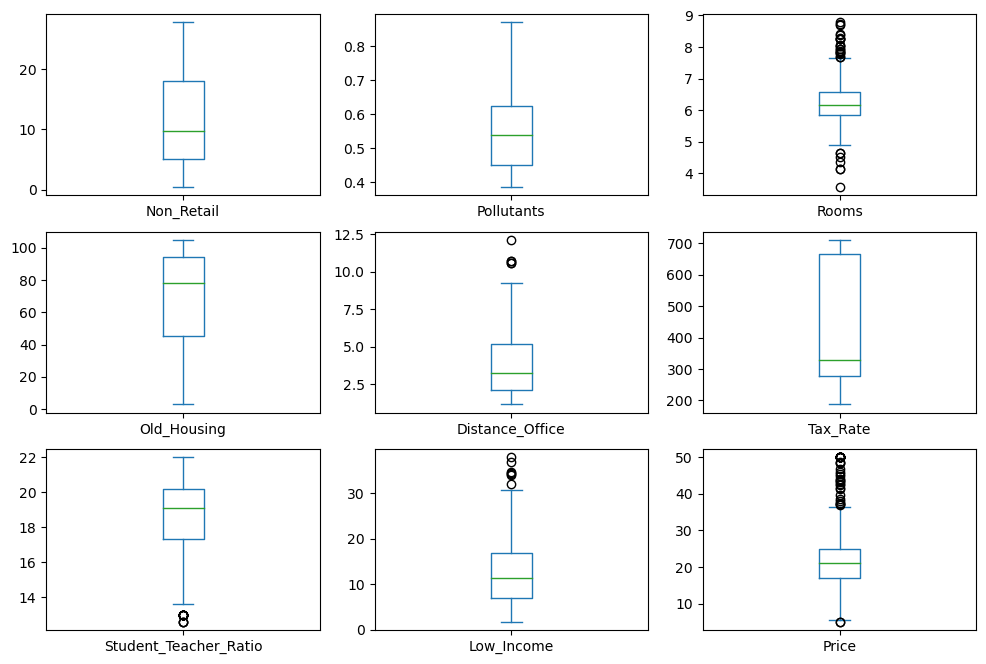

In [13]:
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income","Price"]]
df_numerics.plot(kind='box',  subplots=True, layout=(3,3), figsize=(12, 8))
plt.show()

We observe that Non_Retail, Pollutants, Old_Housing and Tax_Rate have no outliers. And Rooms, Distance_Office, Student_Teacher_Ratio, Low_Income and Price have outliers.

We observe that Distance\_Office, Student\_Teacher\_Ratio and Low\_Income have very little outliers. For these columns, we will be replacing median as we think that each row is a valuable dataset since each row corresponds to a town and it would not be sensible to lose a record of an entire town. We think that replacing median will be better than mean since we see from the box plot, that the median lies within the range but this may not be the case for mean. 

However, as Price and Rooms have a large amount of outliers, we think that it would be better to observe in greater detail by plotting a histogram to be able to conclude whether or not the box plot is accurate and thus, be able to conclude what to do with the outliers.

In further observing the box plot, we see that Tax_Rate has a very large interquartile range so we will investigate this variable by observing its distribution too.

The following code finds the records which contain `Distance_Office` outliers and replaces them with the median.



In [14]:
distOfficeMedian = df["Distance_Office"].median()

q1a = df["Distance_Office"].quantile(0.25)
q3a = df["Distance_Office"].quantile(0.75)
IQRa = q3a - q1a

for idx in df.index[(df["Distance_Office"] > (q3a + 1.5*IQRa))].tolist():
    df.loc[idx,"Distance_Office"] = distOfficeMedian

The following code finds the records which contain `Student_Teacher_Ratio` outliers and replaces them with the median.



In [15]:
stuTeachRatioMedian = df["Student_Teacher_Ratio"].median()
q1b = df["Student_Teacher_Ratio"].quantile(0.25)
q3b = df["Student_Teacher_Ratio"].quantile(0.75)
IQRb = q3b - q1b 

for idx in df.index[(df["Student_Teacher_Ratio"] < (q1b - 1.5*IQRb))].tolist():
    df.loc[idx,"Student_Teacher_Ratio"] = stuTeachRatioMedian

The following code finds the records that are outliers for `Low_Income` and replaces them with the median.



In [16]:
lowIncomeMedian = df["Low_Income"].median()
q1c = df["Low_Income"].quantile(0.25)
q3c = df["Low_Income"].quantile(0.75)
IQRc = q3c - q1c

for idx in df.index[(df["Low_Income"] > (q3c + 1.5*IQRc))].tolist():
    df.loc[idx,"Low_Income"] = lowIncomeMedian

After replacing the outliers for `Distance_Office`, `Student_Teacher_Ratio` and `Low_Income` with median, we plot the Box Plot again  We see that there are no more outliers for `Distance_Office`, `Student_Teacher_Ratio` but there exists one outlier for`Low_Income`.

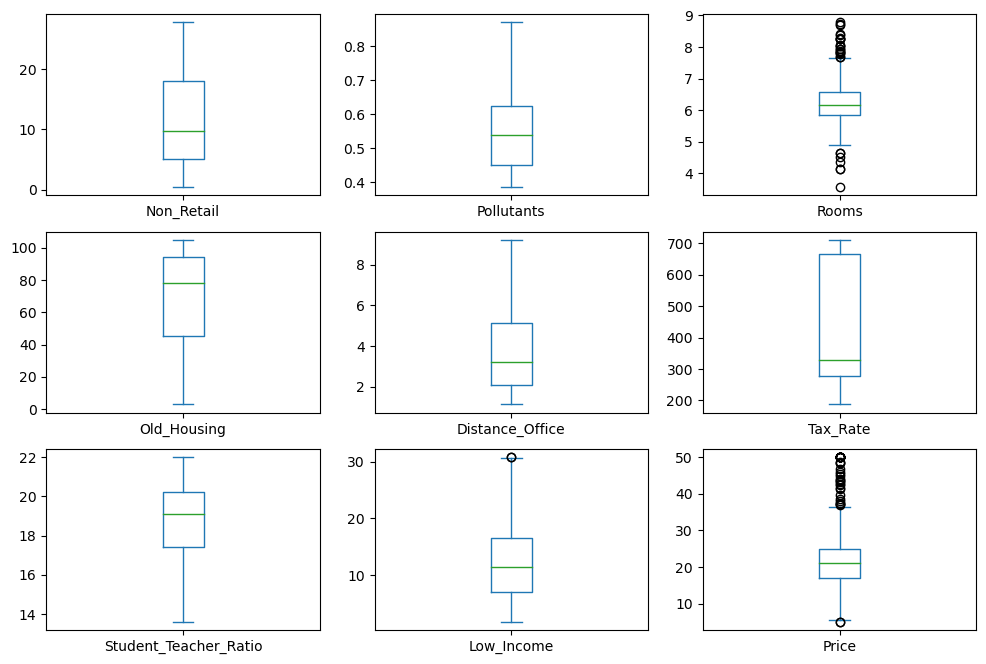

In [17]:
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income","Price"]]
df_numerics.plot(kind='box',  subplots=True, layout=(3,3), figsize=(12, 8))
plt.show()

Thus, we would want to examine the distribution of `Low_Income`. We observe from the distribution that there are on outliers. Hence, the boxplot was a false positive.

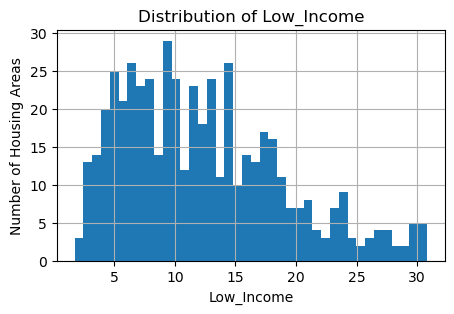

In [18]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Low_Income", fontsize=12)
plt.xlabel("Low_Income", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Low_Income"].hist(bins=40)
plt.show()

For `Rooms`, there are many data points lying outside the lower fence and upper fence. Hence, we cannot conclude from the box plot if there are outliers.

Thus, we plot the histogram to check the distribution. As there are no sudden deviations from the distribution, we determine that there are no outliers for `Rooms`.



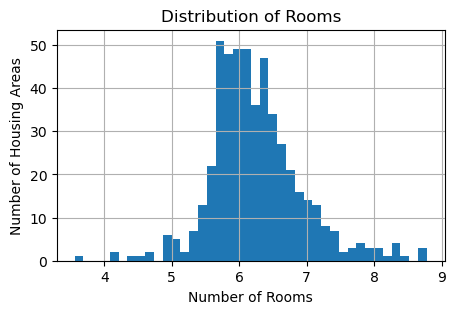

In [19]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Rooms", fontsize=12)
plt.xlabel("Number of Rooms", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Rooms"].hist(bins=40)
plt.show()

For `Price`, we plot the histogram to check the distribution. We determine that there are outliers on the right side which deviates from the distribution

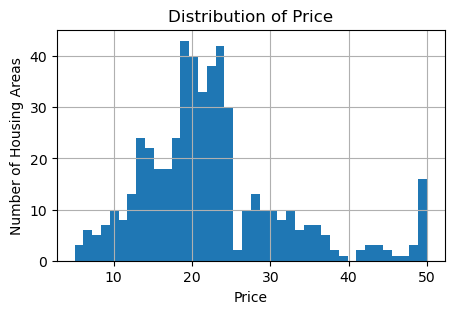

In [20]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Price", fontsize=12)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Price"].hist(bins=40)
plt.show()

For Price, we replace outliers using median.


In [21]:
price_median = df["Price"].median()
for idx in df.index[df["Price"] > 48].tolist():
    df.loc[idx,"Price"] = price_median

Below, we see that after replacing the median, Price now follows a normal distribution.

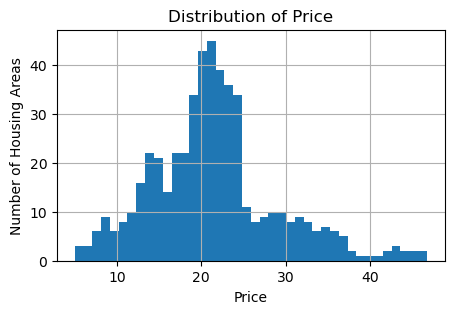

In [22]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Price", fontsize=12)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Number of Housing Areas", fontsize=10)
df["Price"].hist(bins=40)
plt.show()

**c.** For categorical variables, perform the necessary encoding.



For categorical variables `Crime_Rate`, `Residential_Area`, `River`, `Highway_Access`, we perform encoding.

For `Crime_Rate`, `Residential_Area`, `River`, `Highway_Access`, we decided to use ordinal encoding on these values as we believe that assigning a bigger value to High and a smaller value to Low, can provide more context to the data.
e.g. For a variable takes in "High" and "Low", `High" = 1, "Low" = 0`


`River` takes the values "Far" and "Near" so we map these values to 1 and 0 respectively.

In [23]:
encoding = {"Far":1, "Near":0}
df["River_Encoded"] = df["River"].map(encoding)

`Crime_Rate` and `Highway_Access` takes the values "High", "Moderate" and "Low" so we map these values to 2, 1 and 0 respectively.

In [24]:
encoding = {"High":2, "Moderate":1, "Low":0}
df["Crime_Rate_Encoded"] = df["Crime_Rate"].map(encoding)
df["Highway_Access_Encoded"] = df["Highway_Access"].map(encoding)

`Residential_Area` takes the values “Very High”, “High”, “Moderate”, “Low” and “Very Low” so we map these values to 4, 3, 2, 1 and 0 respectively.

In [25]:
encoding = {"Very High":4, "High": 3, "Moderate":2, "Low":1, "Very Low":0}
df["Residential_Area_Encoded"] = df["Residential_Area"].map(encoding)

The following code drops the old columns `Crime_Rate`, `Residential_Area`, `River`, `Highway_Access`.

In [26]:
df.drop(columns=["River","Crime_Rate","Highway_Access","Residential_Area"], inplace=True)

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

We first present the summary of numerical variables in the dataset, followed by categorical variables.

In [27]:
df.iloc[:,2:-3].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,506.0,6.245089,0.682214,3.5610,5.836250,6.162500,6.573000,8.7800
Old_Housing,506.0,69.124506,28.346261,2.9000,45.175000,78.500000,94.500000,105.0000
Distance_Office,506.0,3.718863,1.980751,1.1296,2.100175,3.203325,5.112625,9.2229
Tax_Rate,506.0,408.237154,168.537116,187.0000,279.000000,330.000000,666.000000,711.0000
Student_Teacher_Ratio,506.0,18.635375,1.938263,13.6000,17.400000,19.100000,20.200000,22.0000
Low_Income,506.0,12.326996,6.632190,1.7300,6.950000,11.350000,16.462500,30.8100
Price,506.0,21.460079,7.455268,5.0000,17.025000,21.200000,24.400000,46.7000
River_Encoded,506.0,0.932806,0.250605,0.0000,1.000000,1.000000,1.000000,1.0000


In [28]:
df['River_Encoded'].value_counts()

River_Encoded
1    472
0     34
Name: count, dtype: int64

In [29]:
df['Crime_Rate_Encoded'].value_counts()

Crime_Rate_Encoded
0    385
1    103
2     18
Name: count, dtype: int64

In [30]:
df['Highway_Access_Encoded'].value_counts()

Highway_Access_Encoded
1    292
2    132
0     82
Name: count, dtype: int64

In [31]:
df['Residential_Area_Encoded'].value_counts()

Residential_Area_Encoded
0    390
1     62
4     27
2     18
3      9
Name: count, dtype: int64

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

We choose to use histograms to easily depict the distribution of the various values. 

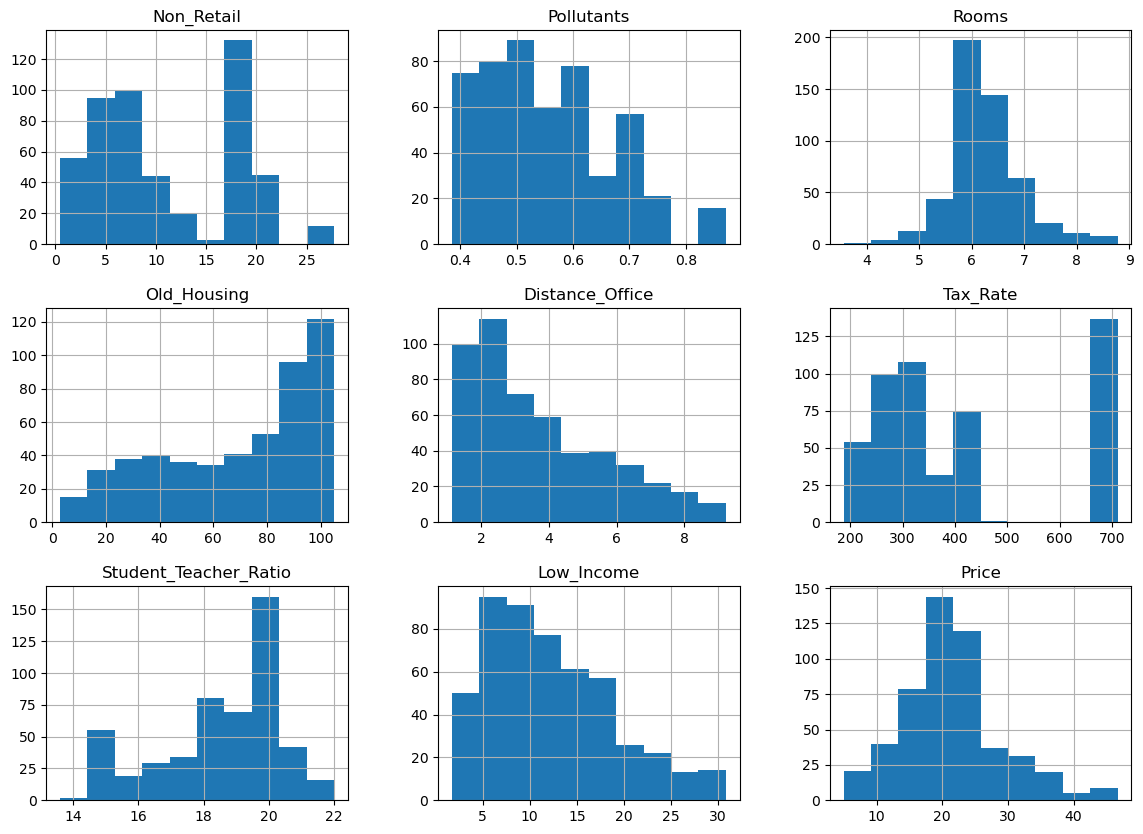

In [32]:
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income","Price"]]
df_numerics.hist(layout=(3, 3), figsize=(14, 10))
plt.show()

The x\-axis depicts the values that the categories \(e.g.Pollutants\) have while the y\-axis depicts the number of occurrences in the value that appears in it.

We will analyse the distributions for each variable - specifically whether or not it follows a normal, right-skewed, left-skewed or bimodal distribution.

For Non\_Retail, the data follows a bimodal distribution.

For Pollutants, the data follows a right-skewed distribution.

For Rooms, the data follows a normal distribution.

For Old\_Housing, the data follows a bimodal distribution.

For Distance\_Office, the data follows a right-skewed distribution.

For Tax\_Rate, the data follows a bimodal distribution.

For Student\_Teacher\_Ratio, the data follows a left\-skewed distribution.

For Low\_Income, the data follows a right-skewed distribution.  

For Price, the data follows a normal distribution.



We use piecharts for categorical data.

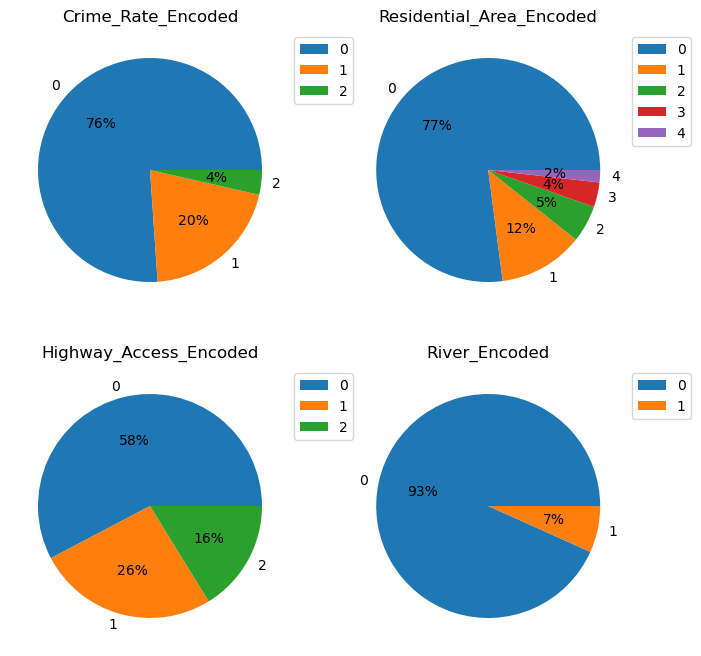

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))

axs[0][0].pie(df["Crime_Rate_Encoded"].value_counts(), labels = (0 ,1, 2), autopct='%1.0f%%')
axs[0][1].pie(df["Residential_Area_Encoded"].value_counts(), labels = (0, 1, 2, 3, 4), autopct='%1.0f%%')
axs[1][0].pie(df["Highway_Access_Encoded"].value_counts(), labels = (0, 1, 2), autopct='%1.0f%%')
axs[1][1].pie(df["River_Encoded"].value_counts(), labels = (0, 1), autopct='%1.0f%%')

axs[0][0].set_title("Crime_Rate_Encoded")
axs[0][1].set_title("Residential_Area_Encoded")
axs[1][0].set_title("Highway_Access_Encoded")
axs[1][1].set_title("River_Encoded")

axs[0][0].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[0][1].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[1][0].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[1][1].legend(bbox_to_anchor=(1, 0, 0.25, 1))

Crime\_rate: 76% of the total number of towns have a low crime rate

Residential\_Area: 77% of the total number of towns has a "Very Low" percentage of residential area greater than 25000 square feet

Highway\_Access: 58% of the total number of towns has a "Low" accessibility to highway

River: 93% of the total number of towns are near a bridge



**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

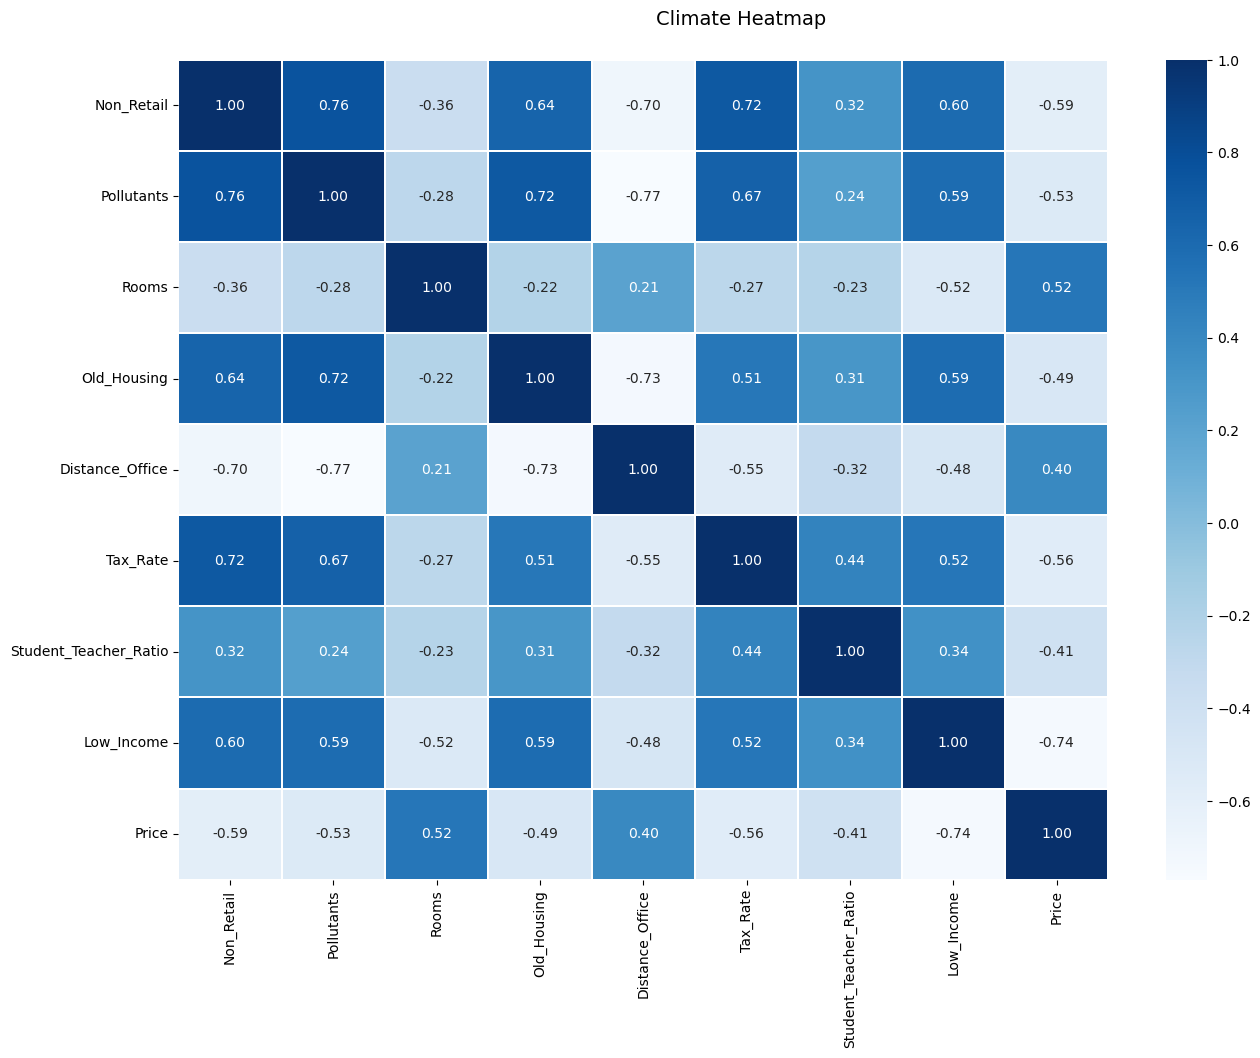

<Figure size 1280x960 with 0 Axes>

In [34]:
f, ax = plt.subplots(figsize=(15, 10))
plt.figure(dpi = 200)

corrMatrix = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income","Price"]].corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap="Blues", fmt='.2f', linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('Climate Heatmap', fontsize=14)

To find the correlation coefficients for our numerical variables, we made the decision to employ a heatmap. We can identify which bivariate associations are worth looking into by looking at the heatmap, which shows which variables have the greatest or weakest link with one another. Those having significant correlation coefficient magnitudes \(&gt;= 0.70\) and other relationships that we can draw insights from will be the focus of our investigation.



## Pollutants and Non_Retail

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


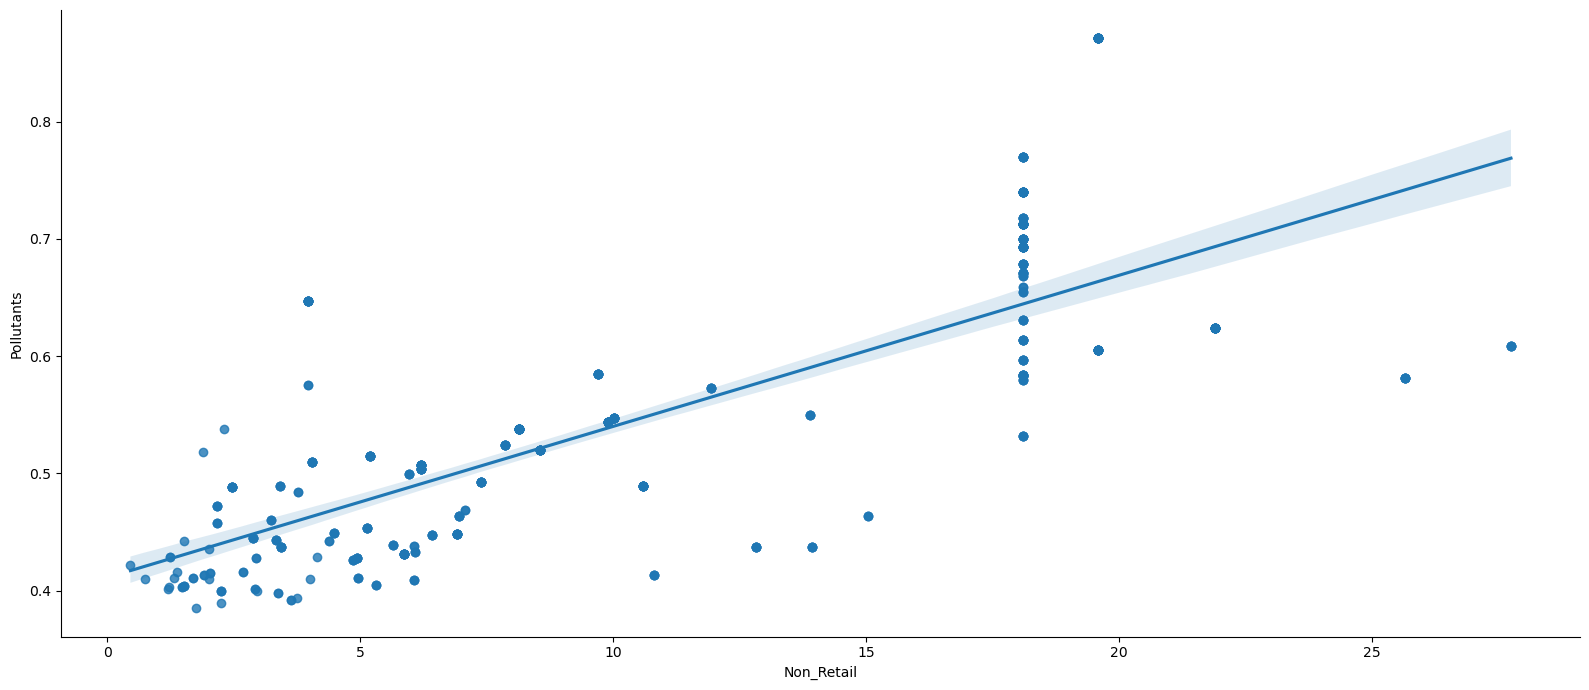

In [35]:
sns.lmplot(data=df, y='Pollutants', x='Non_Retail', height = 7, aspect = 16/7)

The correlation coefficient between Non\_Retail and Pollutants is 0.76. As the concentration of pollutants increases, the percentage of business areas used for non\-retail also increases. As an area becomes more polluted, more demands need to be met such as healthcare services and pollution control services hence there is a need to increase non\-retail businesses in these area.



## Pollutants and Distance_Office



/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


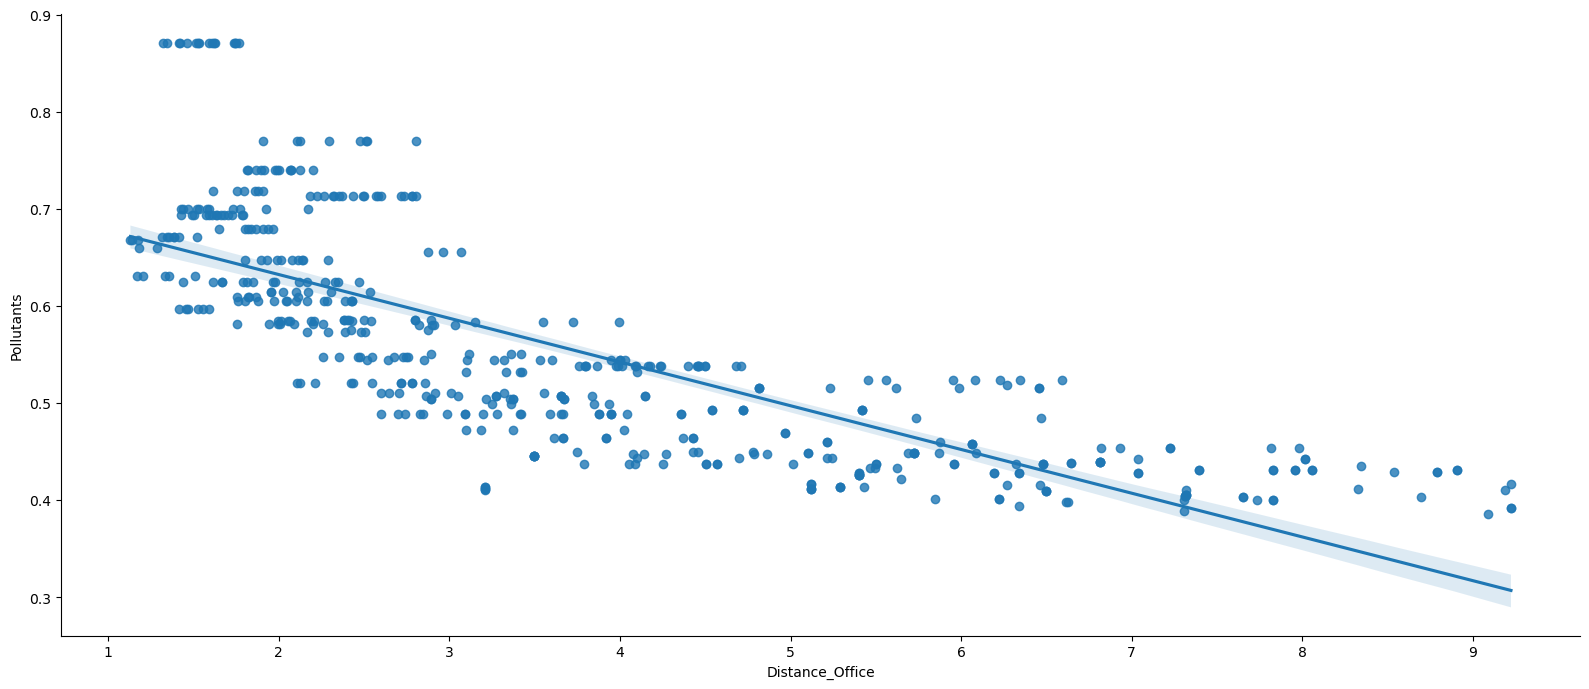

In [36]:
sns.lmplot(data=df, y='Pollutants', x='Distance_Office', height = 7, aspect = 16/7)

The negative correlation coefficient between pollutants and distance\_office is \-0.77,the relationship between pollutants and distance\_office is linear; as the Distance\_Office increases, Pollutants decreases. This correlation can be attributed to the fact that offices are relocating farther from areas with pollution sources to ensure a healthier work environment for employees.



## Distance\_Office and Non\_Retail



/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


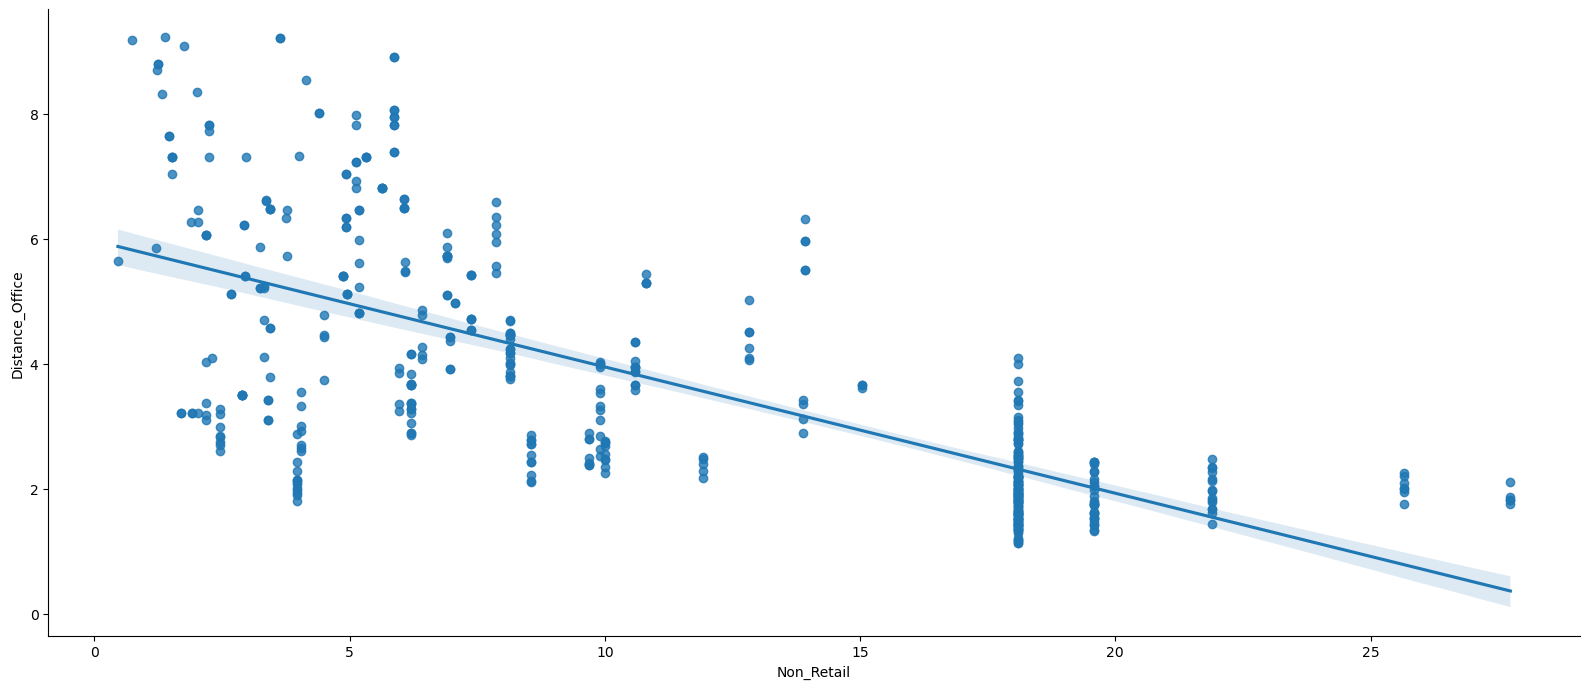

In [37]:
sns.lmplot(data=df, y='Distance_Office', x='Non_Retail', height = 7, aspect = 16/7)

The negative correlation coefficient between Distance_Office and Non-Retail is -0.71. Although the correlation suggests a linear relationship where an increase in Non-Retail corresponds with a decrease in Distance_Office, there may not be a direct connection(meaningful connection) between the two variables. However, since an increase in non-retail will lead to an increase in pollutants, as indicated by the previous graph, it can logically lead to a decrease in distance.

## Pollutants and Old_Housing 



/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


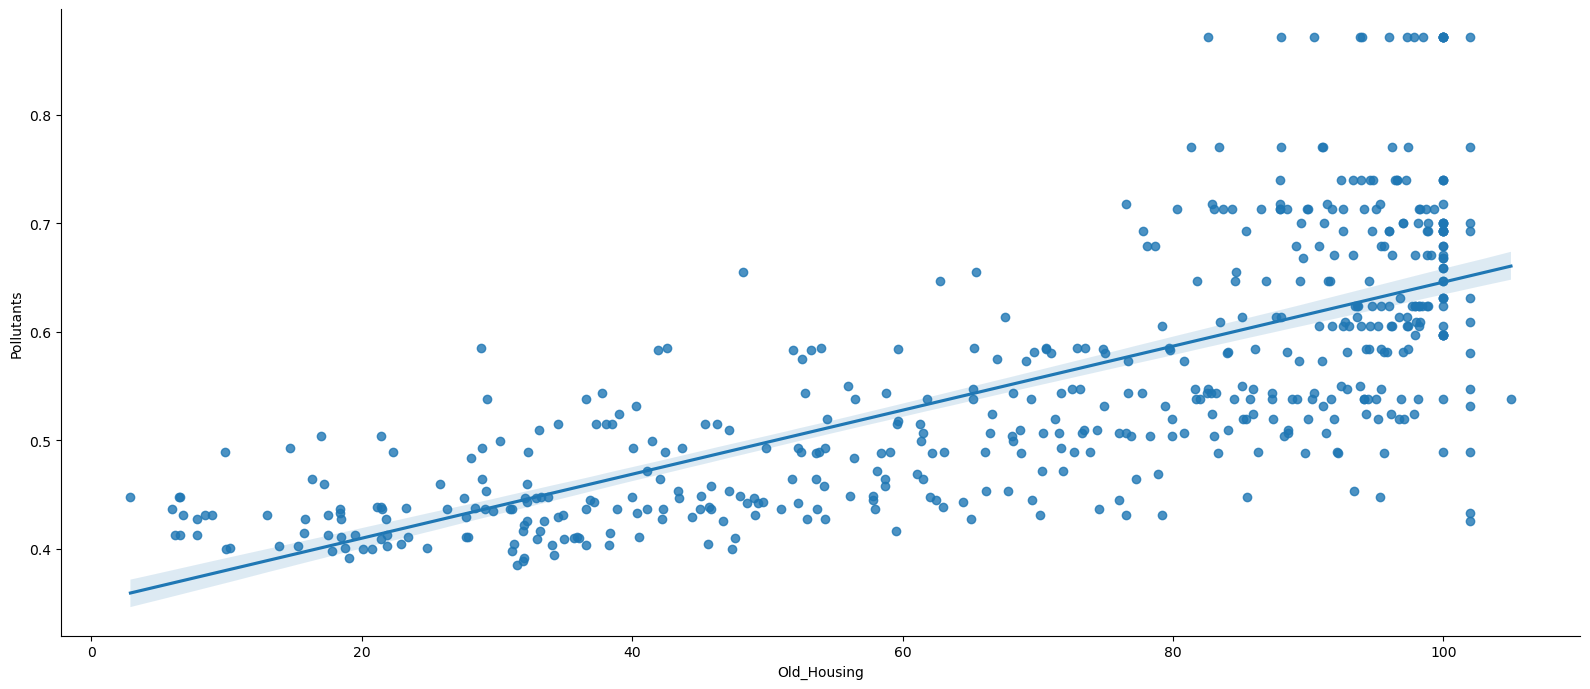

In [38]:
sns.lmplot(data=df, y='Pollutants', x='Old_Housing', height = 7, aspect = 16/7)

The correlation coefficient between Pollutants and Old\_Housing is 0.72. The relationship between Pollutants and Old\_Housing is linear. Generally, as the percentage of Old\_Housing increases, concentration of pollutants increases. The reason could be due to the construction material of old housings. Old housings often lack modern building materials that can mitigate pollutants along with aging infrastructure which can introduce pollutants like lead or chemicals into the atmosphere.


## Low_Income and Price

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


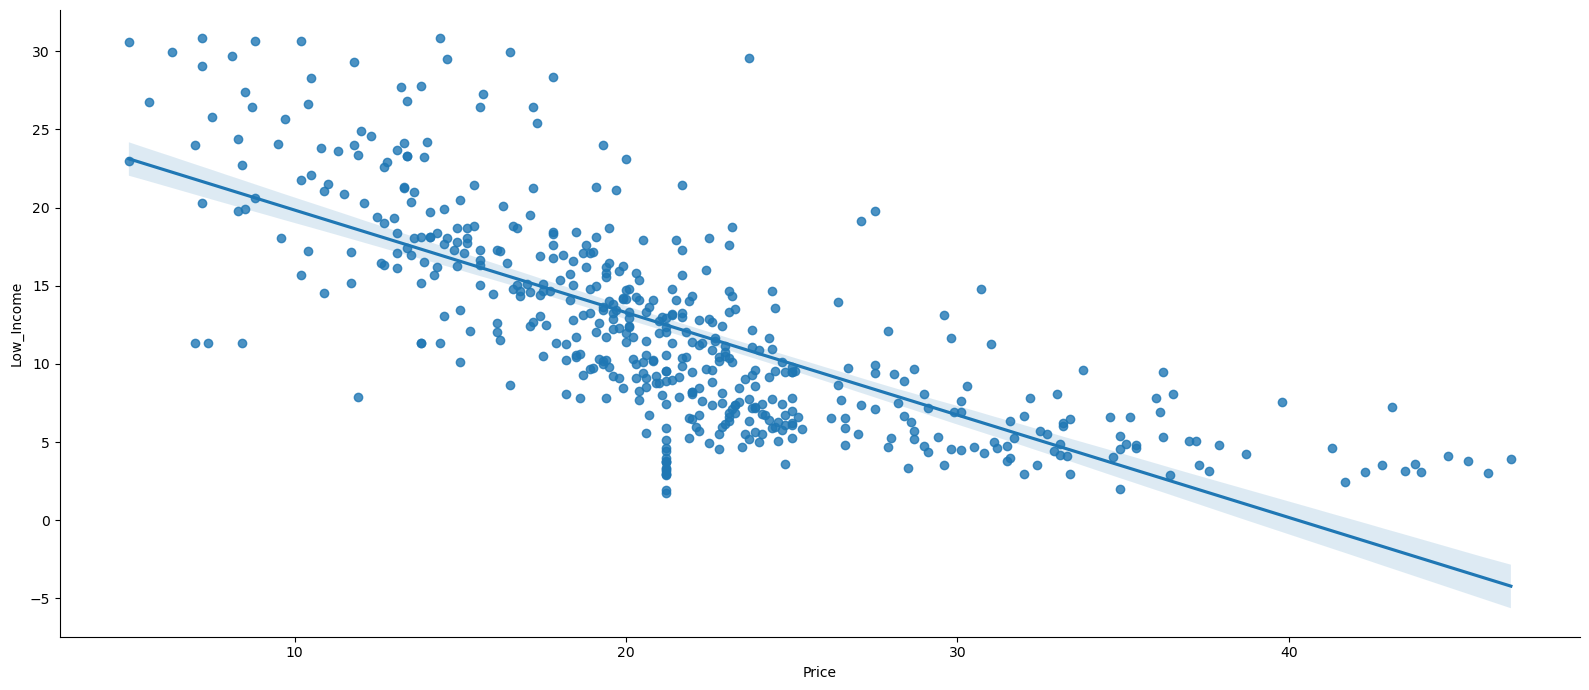

In [39]:
sns.lmplot(data=df, y='Low_Income', x='Price', height = 7, aspect = 16/7)

The correlation coefficient between Price and Low\_Income is \-0.74. The relationship between Price and Low\_Income is linear. Generally, as Price increases, Low\_Income decreases. This is because low income households cannot afford to buy expensive houses hence the median prices of homes would decrease.


## Tax_Rate and Non_Retail

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


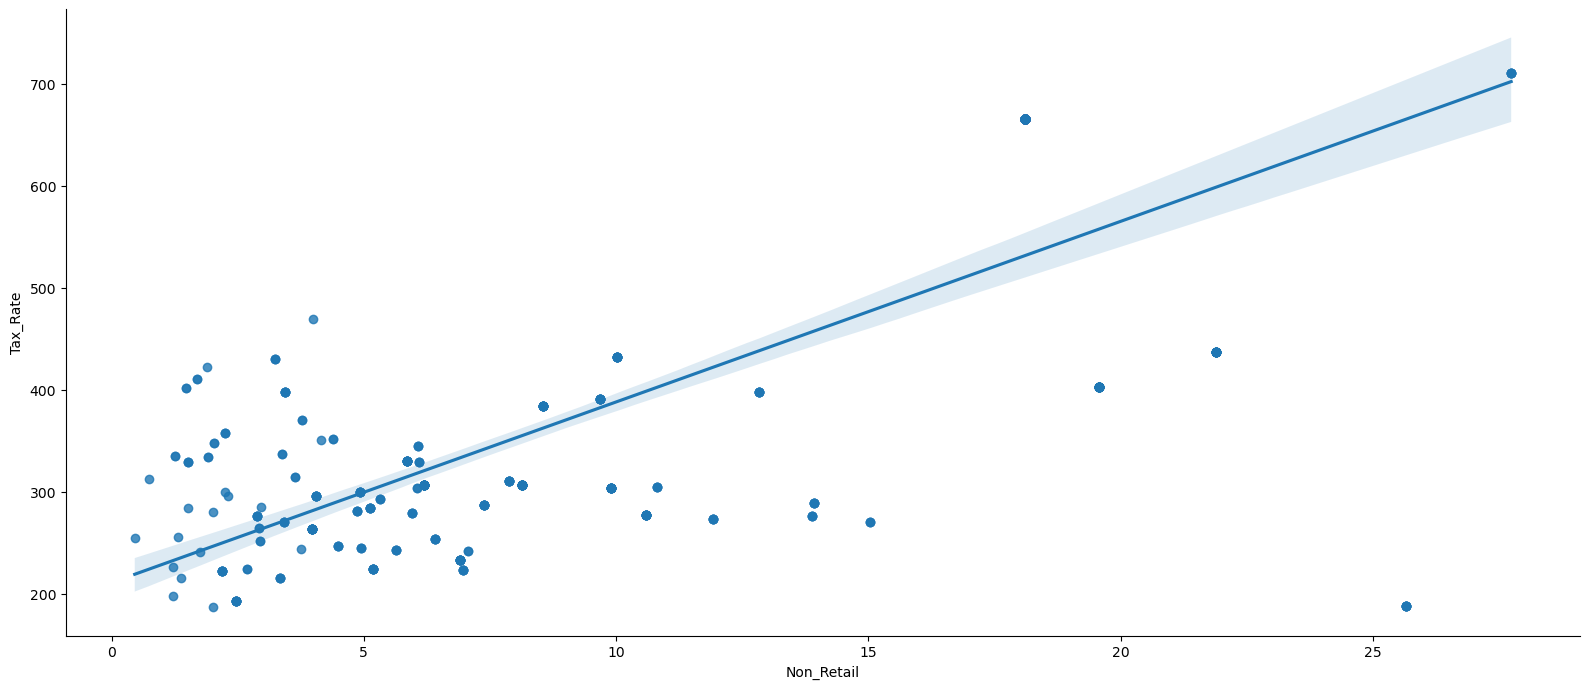

In [40]:
sns.lmplot(data=df, y='Tax_Rate', x='Non_Retail', height = 7, aspect = 16/7)

The correlation coefficient between Tax\_Rate and Non\_Retail is 0.72. As Non\_Retail increases, Tax\_rate increases. With more non retail business increase, more infrastructure and services such as such as roads, utilities, etc. would be used hence there would the tax rate would increase.



## Price and Rooms



/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


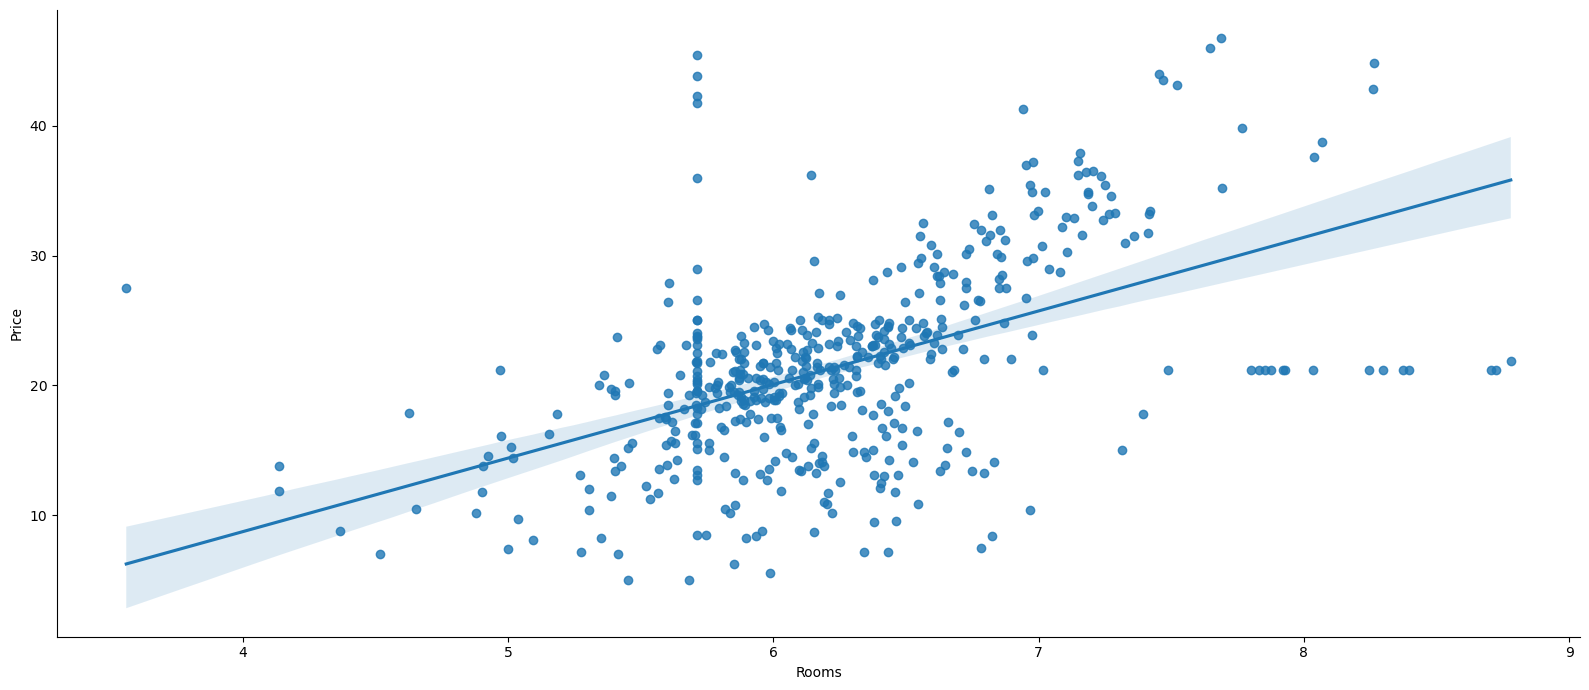

In [41]:
sns.lmplot(data=df, y='Price', x='Rooms', height = 7, aspect = 16/7)

The correlation coefficient between Price and Rooms is 0.67,the relationship between price and the number of rooms is linear; as the number of rooms increases, so does the price. This correlation can be attributed to the fact that an increase in the number of rooms leads to a larger overall area of the house, consequently driving up the price.

## Distance\_Office and Old\_Housing



/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


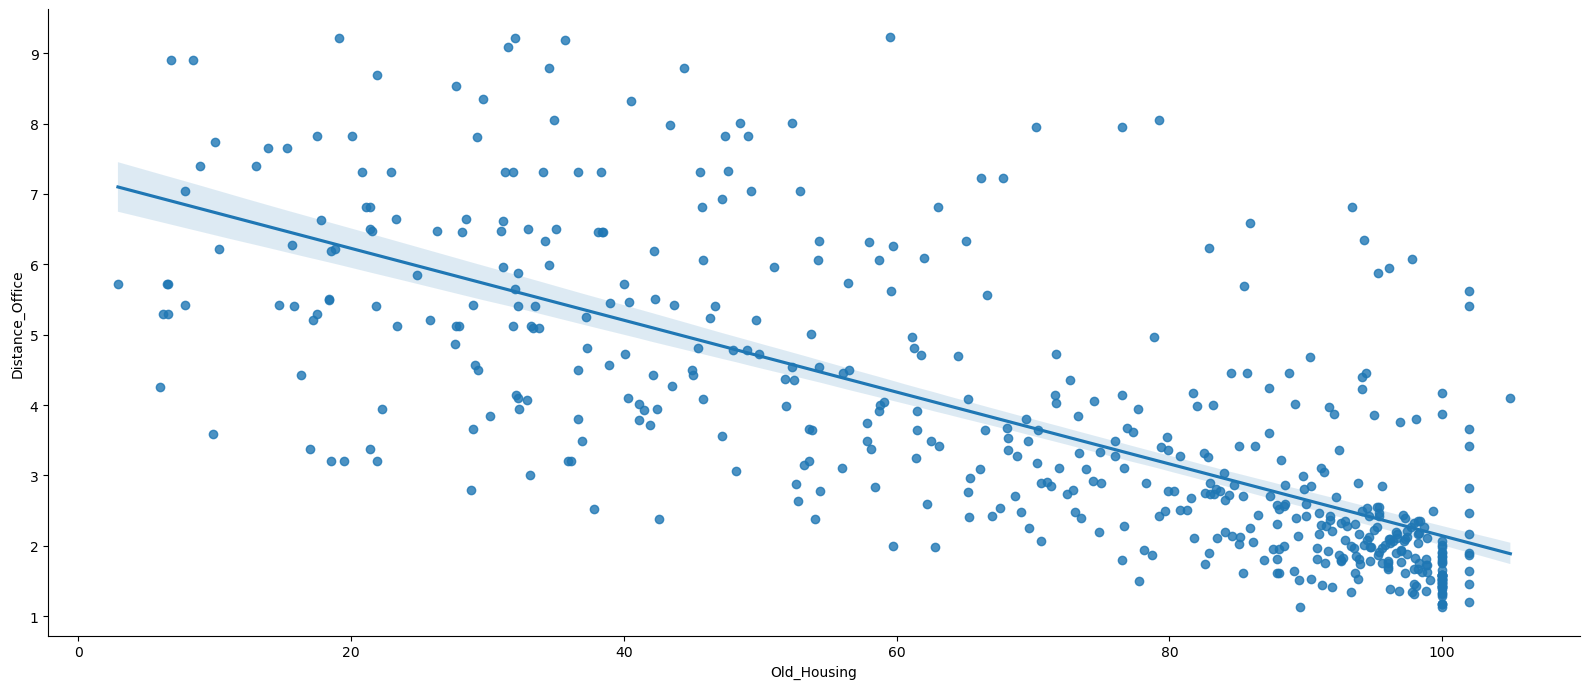

In [42]:
sns.lmplot(data=df, y='Distance_Office', x='Old_Housing', height = 7, aspect = 16/7)

The negative correlation coefficient between distance_office and old_housing is -0.74,the relationship between distance_office and old_housing is linear; as the old_housing increases, distance_office decreases. This correlation can be attributed to the fact that older neighborhoods with buildings from before the Second World War may undergo revitalization efforts, attracting new businesses and residents. This revitalization could result in a decrease in distances to major office areas as these neighborhoods become more desirable and economically vibrant.